1) LINEAR SVM MACHINE LEARNING MODEL

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from numpy import loadtxt

C:\Users\praka.LAPTOP-HFF316K4\Anaconda3\envs\prakprojects\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\praka.LAPTOP-HFF316K4\Anaconda3\envs\prakprojects\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\praka.LAPTOP-HFF316K4\Anaconda3\envs\prakprojects\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\U

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.regularizers import l2

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import scikitplot as skplt

In [5]:
# import csv data file as dataframe and view first 10 records
df=pd.read_csv('./data.csv')
df.head(10)

,Unnamed: 0,Text,Class
0,0,I have outdated information on my credit repor...,C
1,2,An account on my credit report has a mistaken ...,C
2,3,This company refuses to provide me verificatio...,A
3,4,This complaint is in regards to Square Two Fin...,A
4,5,Started the refinance of home mortgage process...,B
5,6,"In XXXX, I and my ex-husband applied for a ref...",B
6,7,I have disputed several accounts on my credit ...,C
7,8,Mortgage was transferred to Nationstar as of X...,B
8,9,"Was a happy XXXX card member for years, in lat...",D
9,10,"Without provocation, I received notice that my...",D


In [6]:
df.columns

Index(['Unnamed: 0', 'Text', 'Class'], dtype='object')

In [7]:
#drop unwanted columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df

,Text,Class
0,I have outdated information on my credit repor...,C
1,An account on my credit report has a mistaken ...,C
2,This company refuses to provide me verificatio...,A
3,This complaint is in regards to Square Two Fin...,A
4,Started the refinance of home mortgage process...,B
...,...,...
128951,Barclay closed my Barclay XXXX MasterCard acco...,D
128952,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,A
128953,I had an account with XXXX in XX/XX/XXXX this ...,A
128954,I was contacted on XX/XX/XXXX email by XXXX fr...,B


In [9]:
#check for null values
df.isnull().sum()

Text     0
Class    0
dtype: int64

In [10]:
#check for NaN values
df.isna().sum()

Text     0
Class    0
dtype: int64

In [11]:
#drop duplicate records
df=df.drop_duplicates()

In [12]:
df

,Text,Class
0,I have outdated information on my credit repor...,C
1,An account on my credit report has a mistaken ...,C
2,This company refuses to provide me verificatio...,A
3,This complaint is in regards to Square Two Fin...,A
4,Started the refinance of home mortgage process...,B
...,...,...
128951,Barclay closed my Barclay XXXX MasterCard acco...,D
128952,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,A
128953,I had an account with XXXX in XX/XX/XXXX this ...,A
128954,I was contacted on XX/XX/XXXX email by XXXX fr...,B


In [13]:
df.count()

Text     125956
Class    125956
dtype: int64

In [14]:
df.groupby('Class')['Text'].count()

Class
A    42814
B    34550
C    29828
D    18764
Name: Text, dtype: int64

In [17]:
# changing categorical target variables to numerical
class_le=LabelEncoder()
df['Class']=class_le.fit_transform(df['Class'].values)

C:\Users\praka.LAPTOP-HFF316K4\Anaconda3\envs\prakprojects\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df

,Text,Class
0,I have outdated information on my credit repor...,2
1,An account on my credit report has a mistaken ...,2
2,This company refuses to provide me verificatio...,0
3,This complaint is in regards to Square Two Fin...,0
4,Started the refinance of home mortgage process...,1
...,...,...
128951,Barclay closed my Barclay XXXX MasterCard acco...,3
128952,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,0
128953,I had an account with XXXX in XX/XX/XXXX this ...,0
128954,I was contacted on XX/XX/XXXX email by XXXX fr...,1


In [254]:
#Identifying type of class for 0
d0=df.loc[df['Class'] == 0]
d0

,Text,Class
2,This company refuses to provide me verificatio...,0
3,This complaint is in regards to Square Two Fin...,0
10,I am writing to request your assistance in loo...,0
21,"My identity was stolen. I filed a complaint, p...",0
29,The first communication that I received from t...,0
...,...,...
128948,I do not owe this company. I have never receiv...,0
128950,"I have never had XXXX billing, and do not owe ...",0
128952,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,0
128953,I had an account with XXXX in XX/XX/XXXX this ...,0


In [259]:
d0['Text'][21]
#Class 0 is related to Debt

'My identity was stolen. I filed a complaint, police report, affidavit, etc. I contacted the original company, and the collection agency to resolve this debt. Both of them keep sending me to each other, and neither will help in resolving this issue. I have spoken to supervisors at each company and still get the same answer- contact the other company. I want this debt removed from my credit, as it was fraudulent. The collection agency even offered to settle for {$300.00}! I am not paying a dime to a company I never had an account with!'

In [261]:
#Identifying type of class for 1
d1=df.loc[df['Class'] == 1]
d1

,Text,Class
4,Started the refinance of home mortgage process...,1
5,"In XXXX, I and my ex-husband applied for a ref...",1
7,Mortgage was transferred to Nationstar as of X...,1
13,Need to move into a XXXX facility. Can no long...,1
16,I had an FHA loan at US Bank that was paid off...,1
...,...,...
128942,"TLA, XXXX XXXX, XXXX MD XXXX, XXXX sent out a ...",1
128943,Recent flood insurance claim check was written...,1
128945,After speaking with CFPB supervisor XXXX XXXX ...,1
128949,I have a mortgage with Caliber Home Loans ( Ac...,1


In [268]:
d1['Text'][128943]
#Class 1 is related to Mortage

"Recent flood insurance claim check was written to the mortgage company and me. it 's now in a secured escrow account and they wo n't release funds to start the repairs to my home. I 'm doing the work myself so they stated that I would have to purchase the materials first then they will reimburse me. So I have to come out of pocket first. They have also taken it upon themselves to make checks payable to the companies that we have submitted estimates for. I try to explain to the Insurance Claim Specialist that the quote was an estimate which can change based on how much material we will need she stated ; we would have to submit yet again another invoice. I tried to explain that this is holding up the building of the home to make it what is was prior to the flooding. She then expressed that 's it 's a process. I then asked for the written notice of this process she then expressed that its and internal memo and she can not share. She then said that I will be reimbursed by Tuesday for the 

In [272]:
#Identifying type of class for 2
d2=df.loc[df['Class'] == 2]
d2

,Text,Class
0,I have outdated information on my credit repor...,2
1,An account on my credit report has a mistaken ...,2
6,I have disputed several accounts on my credit ...,2
11,I am disputing the inaccurate information the ...,2
12,Checked my credit report after filing complain...,2
...,...,...
128855,Chase is showing XXXX accounts on my credit re...,2
128873,I went on transunion XX/XX/XXXX and got messag...,2
128907,I contacted Equifax after receiving documentat...,2
128939,I did not received the proper information on t...,2


In [275]:
d2['Text'][12]
#Class 2 is related to Credit Reports

'Checked my credit report after filing complaint with CFPB on XXXX. Was finally able to get access to the dispute forms and the XXXX XXXX account scheduled for deletion XX/XX/XXXX2017 was still on record. After already registering with my report number, name and social security and placing the dispute in the " dispute cart \'\', when I attempted to upload as instructed, I was taken to another form which requested the same ( and more ) information which was already a matter of record in order to get access to the report in the first place. Screenshots attached. Designed to discourage?'

In [276]:
#Identifying type of class for 3
d3=df.loc[df['Class'] == 3]
d3

,Text,Class
8,"Was a happy XXXX card member for years, in lat...",3
9,"Without provocation, I received notice that my...",3
18,Signed up for the American Express XXXX Card w...,3
47,I have been trying to cancel some monthly subs...,3
50,Hello Dear CFPB I want to share my experience ...,3
...,...,...
128923,XXXX/XXXX/XXXX someone got our info & went to ...,3
128932,I received bills XX/XX/XXXX from Pay Pal Credi...,3
128940,I requested a refund from Citibank in XXXX 201...,3
128941,"DISCOVER CARD PUT NEGATIVE REMARK "" CLOSED BY ...",3


In [280]:
d3['Text'][128941]
#Class 3 is related to Credit Card

'DISCOVER CARD PUT NEGATIVE REMARK " CLOSED BY LENDER \'\' ON THE CREDIT REPORT BECAUSE I HAD TOO MANY DISPUTES AND FRAUD CASES OPEN ON MY ACCOUNT! DISCOVER FAILED TO PROTECT XXXX FROM COMMITING FRAUD ON THE CARD.'

In [19]:
x=df['Text']
y=df['Class']

In [20]:
x

0         I have outdated information on my credit repor...
1         An account on my credit report has a mistaken ...
2         This company refuses to provide me verificatio...
3         This complaint is in regards to Square Two Fin...
4         Started the refinance of home mortgage process...
                                ...                        
128951    Barclay closed my Barclay XXXX MasterCard acco...
128952    Our son was taken to XXXX XXXX XXXX XXXX XXXX ...
128953    I had an account with XXXX in XX/XX/XXXX this ...
128954    I was contacted on XX/XX/XXXX email by XXXX fr...
128955    I had a debit that was included in my chapter ...
Name: Text, Length: 125956, dtype: object

In [21]:
y

0         2
1         2
2         0
3         0
4         1
         ..
128951    3
128952    0
128953    0
128954    1
128955    0
Name: Class, Length: 125956, dtype: int32

In [22]:
# Splitting the training and testing data in the ratio of 7:3, 70% training and 30% testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                        random_state=21, stratify=y)

In [23]:
x_train

43424     I have incorrect info on my credit report with...
16107     I typically overpay my mortgage. I run XXXX mo...
90756     COMPLAIINT : WELLS FARGO N.A, WFHM, & XXXX XXX...
112064    I have received many phone calls claiming to b...
31789     i received a letter from this company stating ...
                                ...                        
35019     File incorrect information on credit report an...
30789     I have tried several times, to have informatio...
48719     I have a home loan through Bank of America. My...
128631    I cancelled internet service and returned a ro...
105617    I did not own a social security number in the ...
Name: Text, Length: 88169, dtype: object

In [24]:
#pattern1 = re.compile('[/(){}\[\]\|@,;#+_]')    # remove all special characters and punctuations
pattern2 = re.compile('[^0-9a-z ]')     # only keep numbers and letters
stops = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 
#sno = nltk.stem.SnowballStemmer('english')

In [143]:
def preprocess(text):
    text = text.lower()
    if bool(re.search(r'\d', text)):
        text = re.sub('[0-9]', '#', text) # search for numbers, if found replace by #
    #text = pattern1.sub(' ', text)
    text = pattern2.sub('', text)
    text = re.sub('x{2,}', '', text) # remove more than 2 x(as case, card numbers etc are represented by xx.. in text)
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stops) # removing stop words and lemmatizing
    return text

In [144]:
x[3]

'This complaint is in regards to Square Two Financial. Refer to CFPB case number XXXX regarding CACH, L. L. C. Square Two Financial has utilized my entire social security number to include date of birth on the pfd document listed with this complaint. The initial complaint was with CACH, L. L. C. and not Square Two Financial. This is in breach of the following : 1. Identity Theft Assumption and Deterrence Act of XXXX 2. Privacy Act of XXXX XXXX. Social Security XXXX 4. XXXX Privacy Act-which carries a maximum XXXX fine for each calendar cap year. \n5. Breach of Title XXXX, XXXX XXXX XXXX XXXX under XXXX and XXXX The solution is to have CACH, L.L.C handle this correction and not Square Two Financial. Two Square Financial submitted the XXXX XXXX XXXX with their subscriber name on the form listed on CFPB case # XXXX they are rendered liable in this matter. In addition, there is an account number associated with this Universal Data Form and they could use that account number instead of a SS

In [145]:
preprocess(x[3])

'complaint regard square two financial refer cfpb case number regarding cach l l c square two financial utilized entire social security number include date birth pfd document listed complaint initial complaint cach l l c square two financial breach following identity theft assumption deterrence act privacy act social security privacy actwhich carry maximum fine calendar cap year breach title solution cach llc handle correction square two financial two square financial submitted subscriber name form listed cfpb case rendered liable matter addition account number associated universal data form could use account number instead ssn dob also includes removal form cfpb case listed pdf document attached case number square two financial contacted email regard matter addition information sale distribution via fax faxscanned copied stored retrieval system recorded transmitted digitally electronically without expressed written consent information protected copyright publishing law information pro

In [146]:
#applying text preprocessing on training data
predata_train=x_train.apply(preprocess)

In [147]:
#applying text preprocessing on testing data
predata_test=x_test.apply(preprocess)

In [152]:
# Initializing Linear SVM model with default parameters (loss=hinge for SVM) 

linearsvc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(loss='hinge'))])


In [153]:
#fitting the model with training data
linearsvc.fit(predata_train, y_train)

C:\Users\praka.LAPTOP-HFF316K4\Anaconda3\envs\prakprojects\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [154]:
#prediction on the model for test data
y_pred2 = linearsvc.predict(predata_test)

accuracy 0.9178288829491624
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12844
           1       0.96      0.97      0.96     10365
           2       0.91      0.87      0.89      8949
           3       0.91      0.89      0.90      5629

    accuracy                           0.92     37787
   macro avg       0.92      0.91      0.91     37787
weighted avg       0.92      0.92      0.92     37787



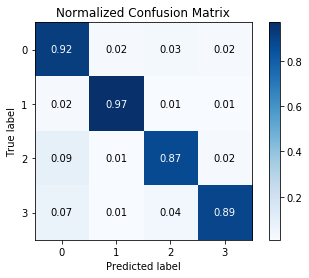

In [155]:
print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=True)

plt.show()

In [85]:
# HYPERPARAMETER TUNING
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__loss': ['hinge','squared_hinge'],
    'clf__C': [0.1, 1, 10, 100]}

In [96]:
clf = GridSearchCV(text_clf, tuned_parameters, cv=5, verbose=10,n_jobs=4)


In [97]:
clf.fit(predata_train, y_train)
ypred1=clf.predict(predata_test)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   48.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 12.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 15.4min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 17.1min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 19.1min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 21.0min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 25.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 28.4min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 40.0min
[Parallel(

In [98]:
ypred1

array([2, 0, 2, ..., 3, 1, 0])

accuracy 0.8710667689946278
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     12844
           1       0.96      0.92      0.94     10365
           2       0.87      0.78      0.82      8949
           3       0.89      0.80      0.84      5629

    accuracy                           0.87     37787
   macro avg       0.88      0.86      0.87     37787
weighted avg       0.88      0.87      0.87     37787



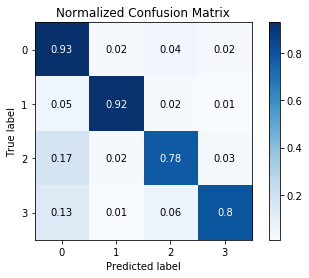

In [99]:
print('accuracy %s' % accuracy_score(y_pred1, y_test))
print(classification_report(y_test, y_pred1))
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=True)
plt.show()

In [102]:
print("Best Score : ", clf.best_score_)
print("Best Parameters : ",clf.best_params_)

Best Score :  0.9197904078841213
Best Parameters :  {'clf__C': 1, 'clf__loss': 'squared_hinge', 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


In [156]:
# Reinitalizing the model with optimal parameters (loss=hinge for svm)
linearsvc4 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer(use_idf=True)),
                ('clf', LinearSVC(loss='hinge', C=1.0))])


In [157]:
# retraining the new tuned model 
linearsvc4.fit(predata_train, y_train)

C:\Users\praka.LAPTOP-HFF316K4\Anaconda3\envs\prakprojects\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [158]:
# predicting with tets values on new model

y_pred5 = linearsvc4.predict(predata_test)

accuracy 0.9238627041045863
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     12844
           1       0.96      0.97      0.96     10365
           2       0.92      0.88      0.90      8949
           3       0.91      0.89      0.90      5629

    accuracy                           0.92     37787
   macro avg       0.92      0.92      0.92     37787
weighted avg       0.92      0.92      0.92     37787



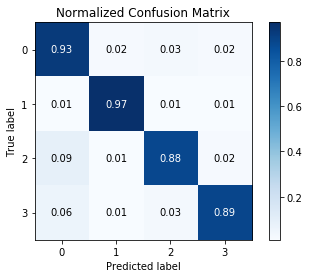

In [159]:
print('accuracy %s' % accuracy_score(y_pred5, y_test))
print(classification_report(y_test, y_pred5))
skplt.metrics.plot_confusion_matrix(y_test, y_pred5, normalize=True)

plt.show()

In [374]:
# Prediction on new samples using the linear svm model tuned for optimal parameters 

examples = str(input("Enter the complaint to classify: "))
egs=preprocess(examples)
example=[egs]
predictions = linearsvc4.predict(example)

if predictions==0:
    print("\nThe given complaint is related to Debt")
    
elif predictions==1:
    print("\nThe given complaint is related to Mortage/Loans")
    
elif predictions==2:
    print("\nThe given complaint is related to Credit Reports")
    
elif predictions==3:
    print("\nThe given complaint is related to Credit Card")
    

Enter the complaint to classify:my credit card number 263892201001 was stolen. someone bought jewelley with it. i had deactivated the card

The given complaint is related to Credit Card.


2) DEEP LEARNING LSTM MODEL FOR TRIAL TO CHECK IF CHANGE IN RESULT

In [287]:
# defining parameters in advance

vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' #for out of vocabulary words, replcae with oov instead of dropping them
training_portion = .8

In [289]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [290]:
# tokenizing the training data

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(predata_train)
word_index = tokenizer.word_index

In [294]:
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 'credit': 2,
 'account': 3,
 'payment': 4,
 'loan': 5,
 'debt': 6,
 'report': 7,
 'would': 8,
 'time': 9,
 'mortgage': 10,
 'information': 11,
 'company': 12,
 'received': 13,
 'told': 14,
 'call': 15,
 'card': 16,
 'nt': 17,
 'letter': 18,
 'bank': 19,
 'called': 20}

In [295]:
# converting token to list of sequences

train_sequences = tokenizer.texts_to_sequences(predata_train)

In [296]:
train_sequences[5]

[320,
 7,
 424,
 64,
 50,
 10,
 3,
 904,
 10,
 1019,
 904,
 10,
 236,
 46,
 25,
 4,
 1697,
 784,
 61,
 37,
 512,
 360,
 3450,
 4,
 735,
 12,
 1192,
 596,
 4,
 2062,
 164,
 905,
 926,
 24,
 273,
 176,
 64,
 24,
 27,
 24,
 696,
 115,
 149,
 391,
 132,
 173,
 904,
 10,
 167,
 4,
 837,
 176,
 249,
 64,
 24,
 53,
 1394,
 195,
 9,
 4,
 17,
 53,
 650,
 37,
 46,
 4,
 20,
 310,
 90,
 257,
 14,
 53,
 242,
 27,
 48,
 696,
 24,
 2695,
 629,
 64,
 1530,
 1158,
 26,
 4,
 4,
 548,
 1590,
 1158,
 64,
 24,
 375,
 323,
 5,
 115,
 1049,
 24,
 41,
 125,
 33,
 1180,
 12,
 555,
 53,
 14,
 447,
 86,
 24,
 4,
 696,
 905,
 3,
 8,
 91,
 63,
 1041,
 66,
 88,
 70,
 2791,
 1329,
 705,
 49,
 733,
 189,
 72,
 75,
 576,
 488,
 69,
 324,
 189]

In [297]:
# padding the sequences to make same size

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [298]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

8
200


In [301]:
# tokenization and convert to list of sequences for testing data

test_sequences = tokenizer.texts_to_sequences(predata_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [305]:
# Comparing original text and preprocessed text 

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(x_train[4])

contacted help obtain letter dynamic recovery solution inquiry credit report removed contacted dynamic recovery solution would allow information involving account social security number match therefore account mine access due social security number match owed outstanding debt involving credit year therefore dynamic recovery solution ground access credit information removed although matter credit report somewhat resolved would like proof client hired <OOV> perform inquiry outstanding debt past year according section <OOV> state statute limitation commence action upon contractual obligation liability express implied except residential rent overcharge certain transaction described uniform commercial code warranty new home must brought within year cause action accrued statute limitation includes consumer credit transaction credit card calculated run date last transaction either last credit purchase last payment made whichever occurs last time purpose contacting cfpb matter reveal dynamic r

In [306]:
# Creating lSTM model

model = tf.keras.Sequential([
    # Adding an Embedding layer with input of size 5000 and output embeddingof size 64 at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#   i.e tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Adding a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [307]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # sparse_categorical_crossentropy for multiclass integer labels

In [311]:
# fitting the model with training data 

history = model.fit(train_padded, y_train, epochs=7, validation_split=0.2, verbose=5)

Train on 70535 samples, validate on 17634 samples
Epoch 1/7
Epoch 2/7
Epoch 3/7
Epoch 4/7
Epoch 5/7
Epoch 6/7
Epoch 7/7


In [312]:
# evaluate the model on testing data

accr = model.evaluate(test_padded,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

37787/37787 [==============================] - 50s 1ms/step
Test set
  Loss: 0.296
  Accuracy: 0.913


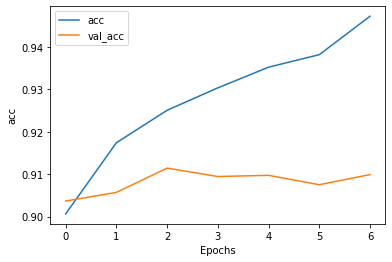

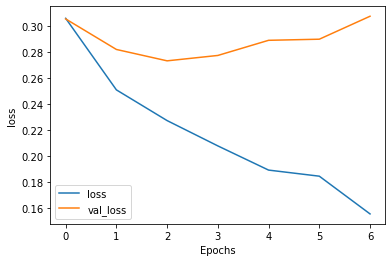

In [318]:
# plot the learning curve of model

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")


In [350]:
# predict the classes of testing data

y_pred6=model.predict_classes(test_padded)
y_pred6

array([2, 0, 2, ..., 3, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     12844
           1       0.95      0.97      0.96     10365
           2       0.90      0.88      0.89      8949
           3       0.90      0.86      0.88      5629

    accuracy                           0.91     37787
   macro avg       0.91      0.91      0.91     37787
weighted avg       0.91      0.91      0.91     37787



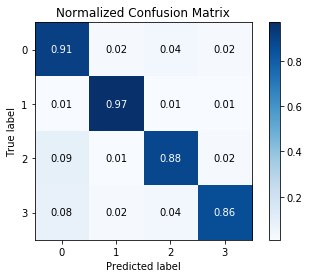

In [352]:
print(classification_report(y_test, y_pred6))
skplt.metrics.plot_confusion_matrix(y_test, y_pred6, normalize=True)
plt.show()

In [373]:
# Prediction on new samples using the LSTM model 

examples = str(input("Enter the complaint to classify:"))
egs=preprocess(examples)
example=[egs]
sequences = tokenizer.texts_to_sequences(example)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = model.predict_classes(padded)


if predictions==0:
    print("\nThe given complaint is related to Debt")
    
elif predictions==1:
    print("\nThe given complaint is related to Mortage/Loans")
    
elif predictions==2:
    print("\nThe given complaint is related to Credit Reports")
    
elif predictions==3:
    print("\nThe given complaint is related to Credit Card")
    

Enter the complaint to classify:my credit card of 252822020 was stolen 

The given complaint is related to Credit Card.
